In [1]:
%matplotlib inline

from collections import Counter
from itertools import islice
import pandas as pd
import matplotlib.pyplot as plt
import os


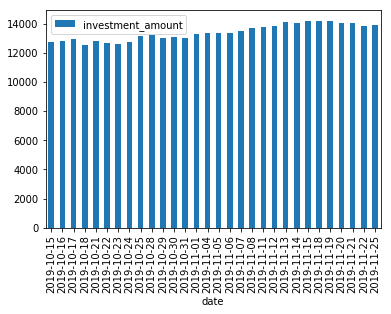

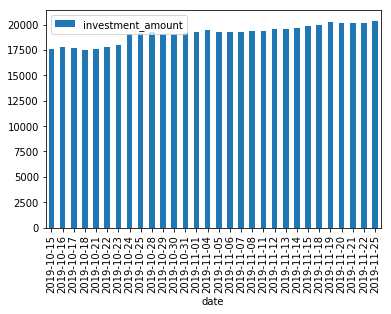

In [9]:
class StockInvestmentArgument():
    
	def __init__(self):
        
		self.max_invest_amount_list =[]
		self.min_invest_amount_list = []
		self.get_csv_files()
		self.get_stock_list()
		self.build_graph()


		
	def get_stock_list(self):
		self.initial_amount =  (100*70.84)/3
		df = self.df.set_index('Date')
		diff_df = df.sort_values(by=['Date']).diff()
		#print df.to_csv('/home/user/Downloads/t.csv')
		count=0
		self.previous_share_dict={}
		self.previous_min_share_dict={}
		for index,row in diff_df[1:].iterrows():
			max_three_list= list(islice(sorted(row.to_dict().items(),key=lambda x:x[1],reverse=True), 3))
			min_three_list = list(islice(sorted(row.to_dict().items(),key=lambda x:x[1]), 3))
			#print max_three_list,min_three_list
			row_dict = df.loc[index].to_dict()
			max_share_dict = {}
			min_share_dict = {}
			if count==0:				
				for each in max_three_list:
					max_share_dict[each[0]]= self.initial_amount/row_dict[each[0]]
				#print (max_share_dict,"max_share_dict")
				self.previous_share_dict=max_share_dict
				self.max_invest_amount_list.append(self.sell_share_stock(row_dict,max_share_dict,index))
				for each in min_three_list:
					min_share_dict[each[0]]= self.initial_amount/row_dict[each[0]]
				self.previous_min_share_dict=min_share_dict
				self.min_invest_amount_list.append(self.sell_share_stock(row_dict,min_share_dict,index))
                
                    
			else:
				max_dict=self.sell_share_stock(row_dict,self.previous_share_dict,index)
				self.max_invest_amount_list.append(max_dict)
				max_amount = max_dict['investment_amount']/3
				
				for each in max_three_list:
					max_share_dict[each[0]]= max_amount/row_dict[each[0]]
				self.previous_share_dict=max_share_dict
				min_dict=self.sell_share_stock(row_dict,self.previous_min_share_dict,index)
				self.min_invest_amount_list.append(min_dict)
				min_amount=min_dict['investment_amount']/3
				for each in min_three_list:
					min_share_dict[each[0]]= min_amount/row_dict[each[0]]
				self.previous_min_share_dict=min_share_dict
			count=count+1
            
	def sell_share_stock(self,stock_row_dict,share_dict,index):
		#print (stock_row_dict,share_dict,"jjjjjjjj")
		highest_share_return_amount = 0
		stock_selection_list=[]
		for k,v in share_dict.items():
			stock_selection_list.append(k)
			highest_share_return_amount = highest_share_return_amount+stock_row_dict[k]*v
		#self.amount=highest_share_return_amount/3
		kwargs ={
            "date":index,
            "investment_amount":highest_share_return_amount,
            "stock_selection":stock_selection_list
            
        }
		return kwargs
		#print (highest_share_return_amount)

	def get_csv_files(self):
		file_path = os.getcwd()+'/stock_files/'
		self.df = pd.DataFrame()
		for each in os.listdir(file_path):
			column_name=each.split('.')[0]
			if len(self.df)>0:
				df1 = pd.read_csv(file_path+each, sep='|')
				df1[column_name]=df1['StockPrice']
				df1=df1.drop(columns=['StockPrice'])
				self.df = pd.merge(self.df,df1,on=['Date'])				
			else:				
				self.df = pd.read_csv(file_path+each, sep='|')
				self.df[column_name]=self.df['StockPrice']
				self.df=self.df.drop(columns=['StockPrice'])
				
			
	def build_graph(self):
		max_investment_graph_df = pd.DataFrame(self.max_invest_amount_list)
		min_investment_graph_df = pd.DataFrame(self.min_invest_amount_list)
		max_investment_graph_df['returns_amount']=max_investment_graph_df['investment_amount'].diff()
		min_investment_graph_df['returns_amount']=min_investment_graph_df['investment_amount'].diff()
		max_investment_graph_df.to_csv('max_investment_stratagy.csv',index=False)
		max_investment_graph_df.to_csv('min_investment_stratagy.csv',index=False)
		max_investment_graph_df.tail(30).plot(kind='bar',x='date',y='investment_amount')
		min_investment_graph_df.tail(30).plot(kind='bar',x='date',y='investment_amount')
        
        



c=StockInvestmentArgument()